## Loading an Image classifier
The following are the steps for most of the DL models:
1. Load and normalize the training and test data
2. Define a convolutional neural network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Load and normalize CIFAR10

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Data visualizations

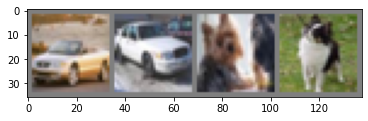

car   car   dog   dog  


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


### 2. Define a Convolutional Neural Network

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()


### 3. Define a Loss function and optimizer

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Trian the network

In [8]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
       print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
       running_loss = 0.0

print("Finished Training")
  

[1,  2000] loss: 2.151
[1,  4000] loss: 1.823
[1,  6000] loss: 1.664
[1,  8000] loss: 1.566
[1, 10000] loss: 1.492
[1, 12000] loss: 1.470
[2,  2000] loss: 1.385
[2,  4000] loss: 1.375
[2,  6000] loss: 1.337
[2,  8000] loss: 1.315
[2, 10000] loss: 1.295
[2, 12000] loss: 1.280
Finished Training


### 5. Testing the model

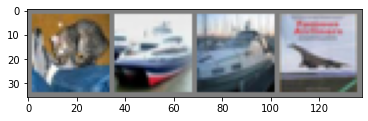

GroundTruth:  cat   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  plane plane


In [13]:
outputs

tensor([[-0.3366, -1.3421, -0.0202,  1.7583, -0.5157,  0.9274,  0.2714, -0.5607,
          0.3987, -0.2107],
        [ 7.9965,  8.2250, -2.6370, -4.6058, -2.4163, -6.1037, -5.9515, -4.7862,
          8.3161,  4.2563],
        [ 4.2858,  3.8390, -1.1733, -1.8023, -1.4857, -2.7618, -3.8900, -1.8457,
          3.9216,  1.6535],
        [ 3.2859,  2.9319, -0.7937, -0.9287, -1.4233, -2.2981, -3.2716, -1.4861,
          2.2269,  2.2018]], grad_fn=<AddmmBackward0>)